# Data Analysis - Follower Counts

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy.stats import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline

In [2]:
#Creating artist_codes dataframe
artists = pd.read_csv('Data/spotify_artists_cleaned.csv')

In [3]:
#Limiting artist data to follower counts under 25,000
artists = artists[(artists['artist_followers']<25000)]

In [4]:
print(artists.info())
artists.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45322 entries, 0 to 53243
Data columns (total 25 columns):
artist_id            45322 non-null object
artist_name          45322 non-null object
artist_genres        45322 non-null object
artist_followers     45322 non-null float64
artist_popularity    45322 non-null int64
blues                45322 non-null bool
children             45322 non-null bool
classical            45322 non-null bool
country              45322 non-null bool
edm                  45322 non-null bool
electronic           45322 non-null bool
folk                 45322 non-null bool
funk                 45322 non-null bool
hiphop               45322 non-null bool
indie                45322 non-null bool
jazz                 45322 non-null bool
latin                45322 non-null bool
pop                  45322 non-null bool
r&b                  45322 non-null bool
rap                  45322 non-null bool
reggae               45322 non-null bool
rock                

,artist_id,artist_name,artist_genres,artist_followers,artist_popularity,blues,children,classical,country,edm,...,jazz,latin,pop,r&b,rap,reggae,rock,soul,soundtrack,genre_count
0,4tN3rZ7cChj4Wns2Wt2Nj6,2 AM,"antiviralpop,kpop,minecraft",2075.0,41,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,1
1,3LsQKoRgMc8VEkQn66jfAQ,2:54,metropopolis,10158.0,19,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,1
2,733SPLVnEyXs6GxUEnJ7bx,11/5,"gfunk,hyphy",14489.0,29,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
4,1h2OVSKRdJHnVqyCKqCLkf,?uestlove,phillyrap,16178.0,34,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,1
6,2McJOiKebPtBGqyEYyZQFN,[:SITD:],"aggrotech,darkwave,ebm,electroindustrial,futur...",13580.0,36,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,1


## 1. Examine Follower Data

In [5]:
#Create dataframes filtered by pop, rock, hiphop, and country genres
pop_artists = artists[(artists['pop']==True)]
rock_artists = artists[(artists['rock']==True)]
hiphop_artists = artists[(artists['hiphop']==True)]
country_artists = artists[(artists['country']==True)]
#Print count of rows
print(len(hiphop_artists))
print(len(rock_artists))
print(len(pop_artists))
print(len(country_artists))

3659
5331
10542
659


In [6]:
#Create test sample array for each genre
hiphop_test_sample = np.array(hiphop_artists['artist_followers'].sample(500))
rock_test_sample = np.array(rock_artists['artist_followers'].sample(500))
pop_test_sample = np.array(pop_artists['artist_followers'].sample(500))
country_test_sample = np.array(country_artists['artist_followers'].sample(500))

In [7]:
#Create dataframe of test sample arrays
followers_test_sample_df = pd.DataFrame({"hiphop": hiphop_test_sample,
                                         'rock': rock_test_sample,
                                         'pop': pop_test_sample,
                                         'country': country_test_sample,
                                        })
followers_test_sample_df.head()

,hiphop,rock,pop,country
0,1413.0,4332.0,2898.0,5419.0
1,210.0,78.0,2910.0,61.0
2,959.0,5615.0,765.0,2011.0
3,1608.0,705.0,3705.0,1124.0
4,2399.0,395.0,754.0,1329.0


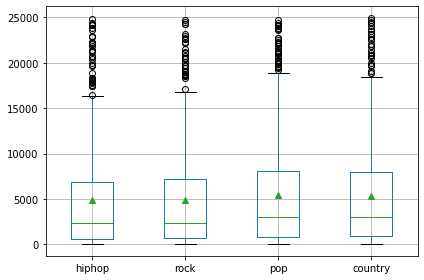

In [8]:
#Boxplot
followers_test_sample_df.boxplot(showmeans=True)
plt.tight_layout()

In [9]:
#Print means
print('Means of the samples are: ', 
      hiphop_test_sample.mean(), 
      rock_test_sample.mean(),
      pop_test_sample.mean(),
      country_test_sample.mean()
     )

Means of the samples are:  4892.854 4854.198 5489.882 5358.278


In [10]:
#Print standard deviation
print('STD of the samples are: ', 
      np.std(hiphop_test_sample), 
      np.std(rock_test_sample),
      np.std(pop_test_sample),
      np.std(country_test_sample)
     )

STD of the samples are:  5867.6160324857665 5770.89979282226 6205.447845568924 5944.560986373678


## 2. ANOVA Test

**H0:** All mean followers count of Pop, Rock, HipHop, and Country genres are equal.

**HA:** Not all mean followers count of Pop, Rock, HipHop, and Country genres are equal.

In [11]:
#Taking a sample of 20% of the size of each genre dataframe
print(len(hiphop_artists)*.2)
print(len(rock_artists)*.2)
print(len(pop_artists)*.2)
print(len(country_artists)*.2)

731.8000000000001
1066.2
2108.4
131.8


In [12]:
#Create test sample array for each genre
hiphop_sample = np.array(hiphop_artists['artist_followers'].sample(732))
rock_sample = np.array(rock_artists['artist_followers'].sample(1066))
pop_sample = np.array(pop_artists['artist_followers'].sample(2108))
country_sample = np.array(country_artists['artist_followers'].sample(132))

In [38]:
#Defining variables

#List of samples
sample_list = [hiphop_sample,
               rock_sample, 
               pop_sample, 
               country_sample]

#Number of groups
k = len(sample_list)

#Sample size of each group
n1 = len(hiphop_sample)
n2 = len(rock_sample)
n3 = len(pop_sample)
n4 = len(country_sample)

#Total sample size
n = n1 + n2 + n3 + n4

#Concatenate all samples to an array
x_all = np.concatenate([hiphop_sample, 
                        rock_sample, 
                        pop_sample, 
                        country_sample])

#Mean for all groups combined
x_bar = x_all.mean()


In [50]:
ss_between = np.sum([len(sample)*(sample.mean() - x_bar)**2 for sample in sample_list])
df_between = k - 1

ss_within = np.sum([(x_all - sample.mean())**2 for sample in sample_list])
df_within = n - k

ss_total = ((x_all - x_bar)**2).sum()
df_total = n - 1


In [56]:
ms_between = ss_between / df_between
ms_within = ss_within / df_within

f_score = ms_between / ms_within
print(f_score)

0.9194789966600809


In [63]:
p_value = 1 - scipy.stats.f.cdf(f_score, df_between, df_within)
p_value

0.4304879693449619

In [69]:
## for the first group
y1_bar = pop_sample1.mean()
ss1 = pop_sample1.var(ddof = 1)

## for the second group
y2_bar = rock_sample1.mean()
ss2 = rock_sample1.var(ddof = 1)

## for the third group
y3_bar = hiphop_sample1.mean()
ss3 = hiphop_sample1.var(ddof = 1)

## for the last group
y4_bar = country_sample1.mean()
ss4 = country_sample1.var(ddof = 1)

In [71]:
## pooled variance
s_p = sum([ss1, ss2, ss3, ss4]) / (sum([n1, n2, n3, n4]) - 4)

In [72]:
y = np.sum([pop_sample1,rock_sample1,country_sample1,hiphop_sample1])

y_bar = y/(n1 + n2 + n3 + n4)

ns_means =(n1 + n2 + n3 + n4)*(np.sum([(y1_bar - y_bar)**2, 
                                       (y2_bar - y_bar)**2,
                                       (y3_bar - y_bar)**2, 
                                       (y4_bar - y_bar)**2 ])) / (t-1)

In [74]:
mod = ols('weight ~ group', data=sample_test_df)

PatsyError: Error evaluating factor: NameError: name 'group' is not defined
    weight ~ group
             ^^^^^

In [ ]:
scipy.stats.f.cdf()